<a href="https://colab.research.google.com/github/mhz1123/internship/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign for Banking Products**


---



**Context:**

Bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


**Objective**:

The classification goal is to predict the likelihood of a liability customer buying personal
loans.


Step 1

1. Importing the required libraries

In [1]:
import numpy as np          # linear algebra
import pandas as pd         # data processing
import seaborn as sns       #visualisation
import matplotlib.pyplot as plt       #visualisation
%matplotlib inline
sns.set(style="ticks")






/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# reading data from the dataset file
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

In [6]:
#first 10 rows of the dataset
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
#last ten rows of the dataset
data.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


In [8]:
# attributes or features of the dataset
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


*  The data has 5000 rows and 13 columns/features
*  All the features are of numerical data type

In [10]:
# descriptive stats. (central tendencies) gives us insight about the data
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
#
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

**Inference**

Among these 5000 customers, only 9.6% accepted the personal loan that was
offered to them in the earlier campaign.

Only 10.4% have securities account 

Only 6.04%  have a certificate of deposit (CD) account with
the bank

59.6% use online banking facalities

29.4% use a credit card issued by the bank

*  Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

*  Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median.

*  Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

*  CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

*  Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

*  The variables family and education are ordinal variables. The distribution of families is evenly distributes

*  Personal loan is the target column where it gives two values 1(means  this customer accepted the personal loan offered in the last campaign) and 0( means  this customer did not accept the personal loan offered in the last campaign

*  In the entire dataset only 480 accepted the loan offer in the last campaing

In [9]:
# shape of the data or dimensionality of the dataset
data.shape

(5000, 14)

 **Information on the features or attributes.** 

**The attributes can be divided accordingly :**

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

**The binary category have five variables as below**:

>**Personal Loan** - Did this customer accept the personal loan offered in the last campaign? *This is our target variable*

>**Securities Account** - Does the customer have a securities account with the bank?

>**CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?

>**Online** - Does the customer use internet banking facilities?

>**Credit Card** - Does the customer use a credit card issued by UniversalBank?


**Interval variables are as below:**

>**Age** - Age of the customer

>**Experience** - Years of experience

>**Income** - Annual income in dollars

>**CCAvg** - Average credit card spending

>**Mortage** - Value of House Mortgage

**Ordinal Categorical Variables are:**

>**Family** - Family size of the customer

>**Education** - education level of the customer

**The nominal variable is :**

>ID

>Zip Code

 

Step 2

Checking, if there is anything to clean in the data

In [ ]:
#checking if there are any null values in the data(if any impute them with median, not mean as it is very sensitive to outliers)
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

*  no null values found hence no imputation needed

In [12]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


*  Here we can see that experience is not that use full for our model, so, we can neglect it, but first lets check its correlation with age as it seems to highly correlate with age
*  And also id column as it does not help the model either, as discussed earlier

In [ ]:
exp=data['Experience']
age = data['Age']
correlation= exp.corr(age)
correlation

0.9942148569683321

*  very high correlation in age and experience columns hence droppping the experience column as it is kind of use less in this case.



*   hence dropping irrelevant columns

In [ ]:
# deleting the id and experience columns
data = data.drop(['ID','Experience'],axis=1)
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


*  Now, as the data is cleaned, let's move on to EDA

Step 3

**EDA**

In [ ]:
# finding the number of unique values in the data for each column
data.apply(lambda x: len(x.unique()))

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

*  This shows the number of unique values in each column

In [ ]:
# number of people with zero mortgage 
data.query('Mortgage == "0"').Mortgage.count()

3462

In [ ]:
#number of people with zero average spending on credit cards per month ($000)
data.query('CCAvg == "0"').CCAvg.count()

106

In [ ]:
# value count of all columns, i.e, frequency of values occuring in the columns
for column in data.columns:
     print("\n" + column)
     print(data[column].value_counts())



Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Income
44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

ZIP Code
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

CCAvg
0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
      

*  From the above data we get a very good knowledge about the data

For example:

>3530 use credit card issued by the bank and 1470 dont

>2984 use online banking facilities and 2016 dont

>480 accepted the personal loan offered in the last
campaign

etc.

**Univariate Analysis**

*  Analysis done based only on one variable.



**Distribution Plot**
*  Distribution plot gives the density of distributions from point to point in general term


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


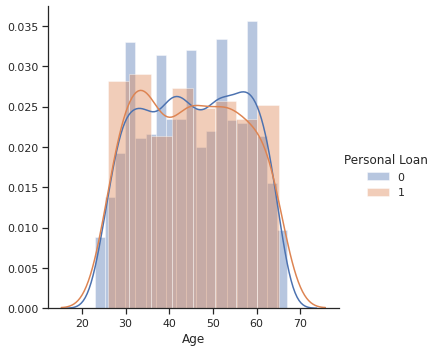

In [14]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Age").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


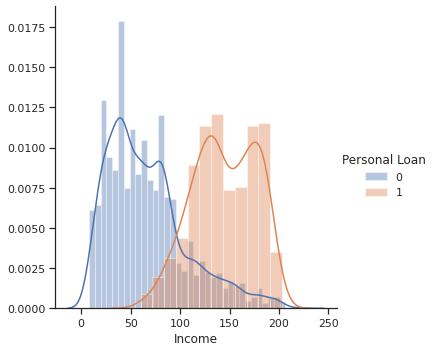

In [15]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Income").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


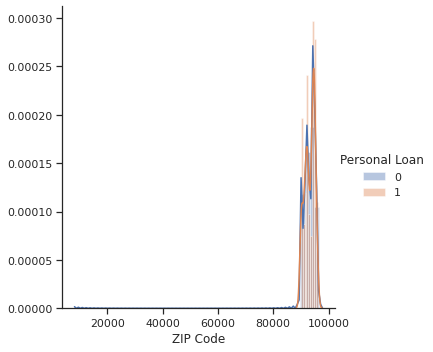

In [16]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"ZIP Code").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


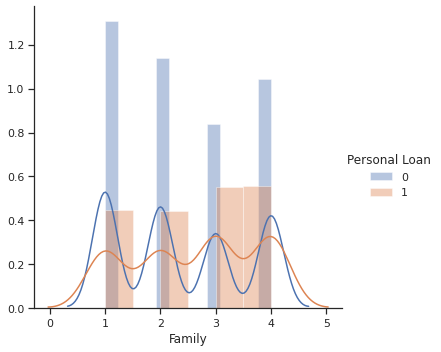

In [17]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Family").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


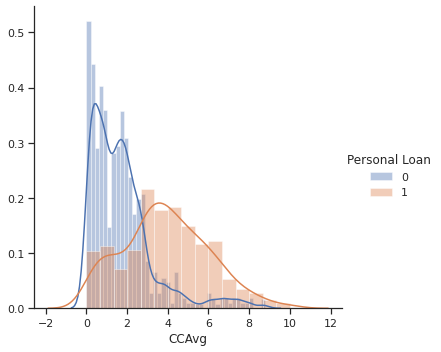

In [18]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"CCAvg").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


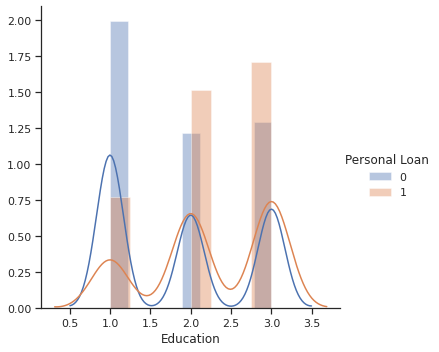

In [19]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Education").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


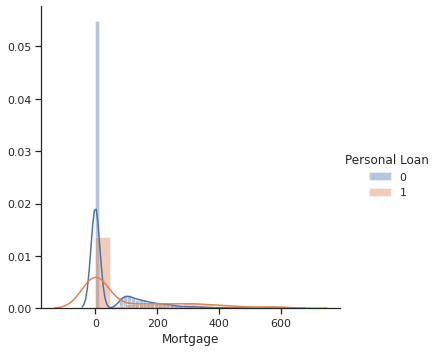

In [20]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Mortgage").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


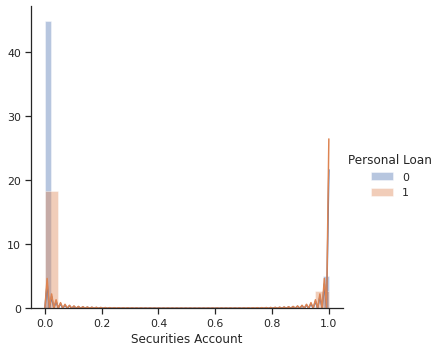

In [21]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Securities Account").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


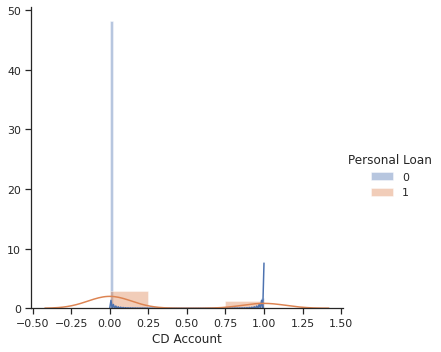

In [22]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"CD Account").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


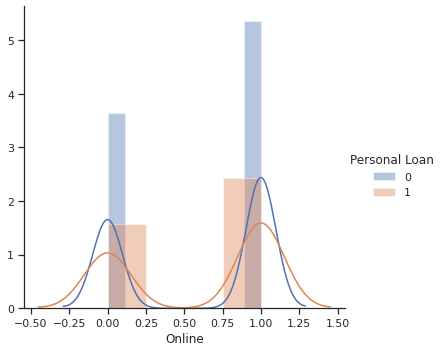

In [23]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"Online").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


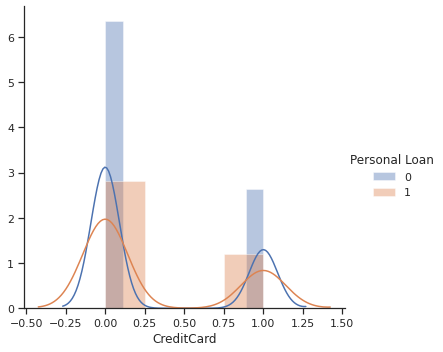

In [25]:
sns.FacetGrid(data, hue= "Personal Loan", size=5).map(sns.distplot,"CreditCard").add_legend()